# ДЗ №1

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split

## 1. Определение функций, которые понадобятся для обучения

In [2]:
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

In [3]:
# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = layer2[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

In [4]:
# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [5]:
def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

In [6]:
# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

## 2. Подготовка тренировочных данных

In [7]:
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
iris_data = pd.read_csv("Iris.csv")
print(iris_data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


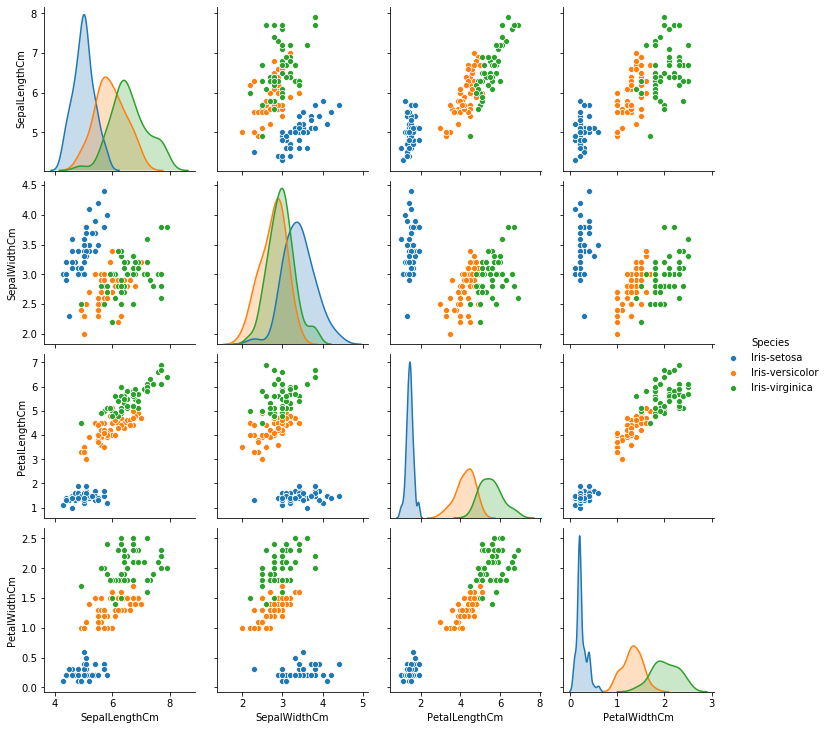

In [8]:
# репрезентация данных в виде графиков
g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")
plt.show()

In [9]:
# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [10]:
# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
x = normalize(x.to_numpy())
x[1:10]

array([[0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ],
       [0.78417499, 0.5663486 , 0.2468699 , 0.05808704],
       [0.78010936, 0.57660257, 0.23742459, 0.0508767 ],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 ],
       [0.80642366, 0.5315065 , 0.25658935, 0.03665562],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451]])

In [11]:
# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
y = y.to_numpy()
y = y.flatten()
y = to_one_hot(y)
y[1:10]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [12]:
# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
np.shape(X_train), X_train.shape

((120, 4), (120, 4))

## Шаг 3. Обученние нейронной сети

In [14]:
# присваевание случайных весов
np.random.seed(1)
w0 = 2*np.random.random((4, 5)) - 1 # для входного слоя   - 4 входа, 3 выхода
w1 = 2*np.random.random((5, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода
w0, w1

(array([[-0.16595599,  0.44064899, -0.99977125, -0.39533485, -0.70648822],
        [-0.81532281, -0.62747958, -0.30887855, -0.20646505,  0.07763347],
        [-0.16161097,  0.370439  , -0.5910955 ,  0.75623487, -0.94522481],
        [ 0.34093502, -0.1653904 ,  0.11737966, -0.71922612, -0.60379702]]),
 array([[ 0.60148914,  0.93652315, -0.37315164],
        [ 0.38464523,  0.7527783 ,  0.78921333],
        [-0.82991158, -0.92189043, -0.66033916],
        [ 0.75628501, -0.80330633, -0.15778475],
        [ 0.91577906,  0.06633057,  0.38375423]]))

In [15]:
# скорость обучения (learning rate)
n = 0.1

In [16]:
# массив для ошибок, чтобы потом построить график
errors = []

In [17]:
# процесс обучения
for i in range(100000):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100
    
    if not((i+1) % 5000):
        print(f"epoсh: {i+1}")

epoсh: 5000
epoсh: 10000
epoсh: 15000
epoсh: 20000
epoсh: 25000
epoсh: 30000
epoсh: 35000
epoсh: 40000
epoсh: 45000
epoсh: 50000
epoсh: 55000
epoсh: 60000
epoсh: 65000
epoсh: 70000
epoсh: 75000
epoсh: 80000
epoсh: 85000
epoсh: 90000
epoсh: 95000
epoсh: 100000


## Шаг 4. Демонстрация полученных результатов

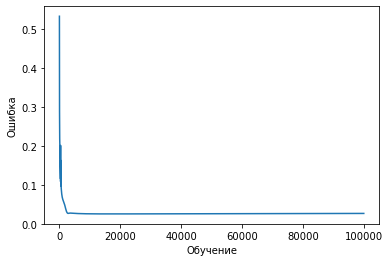

In [18]:
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть 

In [19]:
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

Точность нейронной сети 97.37%


## Шаг 5. Подбор параметров

In [20]:
# процесс обучения
def two_layer_nn_learning(lr=0.1, epoch=100000, n_number=5):
    errors = []
    np.random.seed(1)
    w0 = 2*np.random.random((4, n_number)) - 1 # для входного слоя
    w1 = 2*np.random.random((n_number, 3)) - 1 # для внутреннего слоя
    
    for i in range(epoch):
        # прямое распространение(feed forward)
        layer0 = X_train
        layer1 = sigmoid(np.dot(layer0, w0))
        layer2 = sigmoid(np.dot(layer1, w1))

        # обратное распространение(back propagation) с использованием градиентного спуска
        layer2_error = y_train - layer2
        layer2_delta = layer2_error * sigmoid_deriv(layer2)

        layer1_error = layer2_delta.dot(w1.T)
        layer1_delta = layer1_error * sigmoid_deriv(layer1)

        w1 += layer1.T.dot(layer2_delta) * lr
        w0 += layer0.T.dot(layer1_delta) * lr

        error = np.mean(np.abs(layer2_error))
        errors.append(error)
        accuracy = (1 - error) * 100

        if not((i+1) % 5000):
            print(f"\tepoсh: {i+1}")
    
    return errors, accuracy, w0, w1

In [21]:
errors = []
errors, accuracy, w0_tr, w1_tr = two_layer_nn_learning()

	epoсh: 5000
	epoсh: 10000
	epoсh: 15000
	epoсh: 20000
	epoсh: 25000
	epoсh: 30000
	epoсh: 35000
	epoсh: 40000
	epoсh: 45000
	epoсh: 50000
	epoсh: 55000
	epoсh: 60000
	epoсh: 65000
	epoсh: 70000
	epoсh: 75000
	epoсh: 80000
	epoсh: 85000
	epoсh: 90000
	epoсh: 95000
	epoсh: 100000


In [22]:
def two_layer_nn_predict(x, w0, w1):
    layer0 = x
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))
    return layer2

In [23]:
pr = two_layer_nn_predict(X_train, w0_tr, w1_tr)

In [24]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

In [25]:
pr_tr = two_layer_nn_predict(X_train, w0_tr, w1_tr)
print(f"mean_absolute_error train:\t{mean_absolute_error(y_train, pr_tr):.3f}\n")
pr_ts = two_layer_nn_predict(X_test, w0_tr, w1_tr)
print(f"mean_absolute_error test:\t{mean_absolute_error(y_test, pr_ts):.3f}\n")

mean_absolute_error train:	0.026

mean_absolute_error test:	0.040



Шаг обучения: 1.0 Эпох: 5000 Нейронов: 4


C:\Users\viv232\anaconda3\envs\r_l\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


	epoсh: 5000


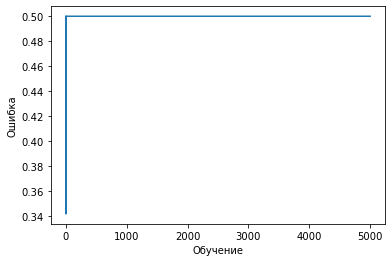

	Точность нейронной сети:	50.0%
	mean_absolute_error train:	0.500
	mean_absolute_error test:	0.500


Шаг обучения: 1.0 Эпох: 5000 Нейронов: 5


C:\Users\viv232\anaconda3\envs\r_l\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\viv232\anaconda3\envs\r_l\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\viv232\anaconda3\envs\r_l\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


	epoсh: 5000


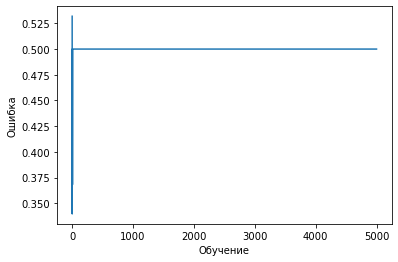

	Точность нейронной сети:	50.0%
	mean_absolute_error train:	0.500
	mean_absolute_error test:	0.500


Шаг обучения: 1.0 Эпох: 5000 Нейронов: 6


C:\Users\viv232\anaconda3\envs\r_l\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\viv232\anaconda3\envs\r_l\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\viv232\anaconda3\envs\r_l\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


	epoсh: 5000


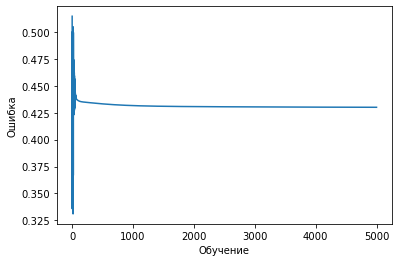

	Точность нейронной сети:	57.0%
	mean_absolute_error train:	0.430
	mean_absolute_error test:	0.467


Шаг обучения: 1.0 Эпох: 5000 Нейронов: 9


C:\Users\viv232\anaconda3\envs\r_l\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\viv232\anaconda3\envs\r_l\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\viv232\anaconda3\envs\r_l\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


	epoсh: 5000


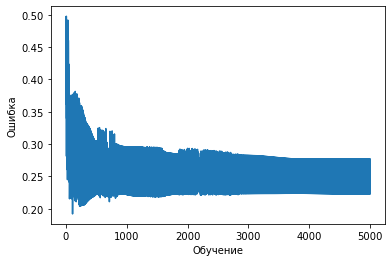

	Точность нейронной сети:	72.32%
	mean_absolute_error train:	0.225
	mean_absolute_error test:	0.190


Шаг обучения: 0.1 Эпох: 10000 Нейронов: 4


C:\Users\viv232\anaconda3\envs\r_l\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\viv232\anaconda3\envs\r_l\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


	epoсh: 5000
	epoсh: 10000


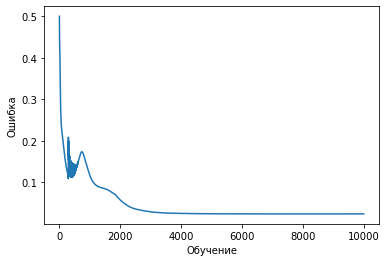

	Точность нейронной сети:	97.59%
	mean_absolute_error train:	0.024
	mean_absolute_error test:	0.044


Шаг обучения: 0.1 Эпох: 10000 Нейронов: 5
	epoсh: 5000
	epoсh: 10000


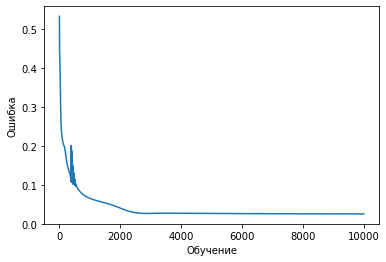

	Точность нейронной сети:	97.48%
	mean_absolute_error train:	0.025
	mean_absolute_error test:	0.041


Шаг обучения: 0.1 Эпох: 10000 Нейронов: 6
	epoсh: 5000
	epoсh: 10000


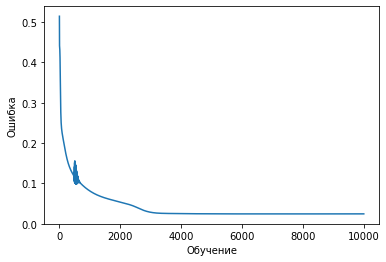

	Точность нейронной сети:	97.56%
	mean_absolute_error train:	0.024
	mean_absolute_error test:	0.038


Шаг обучения: 0.1 Эпох: 10000 Нейронов: 9
	epoсh: 5000
	epoсh: 10000


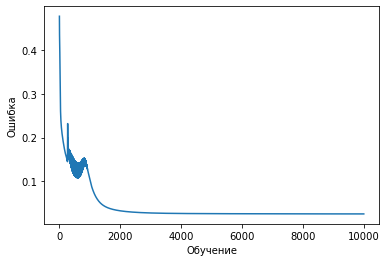

	Точность нейронной сети:	97.44%
	mean_absolute_error train:	0.026
	mean_absolute_error test:	0.048


Шаг обучения: 0.01 Эпох: 35000 Нейронов: 4
	epoсh: 5000
	epoсh: 10000
	epoсh: 15000
	epoсh: 20000
	epoсh: 25000
	epoсh: 30000
	epoсh: 35000


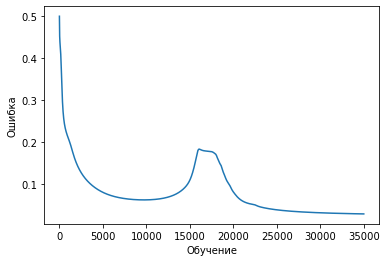

	Точность нейронной сети:	97.02%
	mean_absolute_error train:	0.030
	mean_absolute_error test:	0.048


Шаг обучения: 0.01 Эпох: 35000 Нейронов: 5
	epoсh: 5000
	epoсh: 10000
	epoсh: 15000
	epoсh: 20000
	epoсh: 25000
	epoсh: 30000
	epoсh: 35000


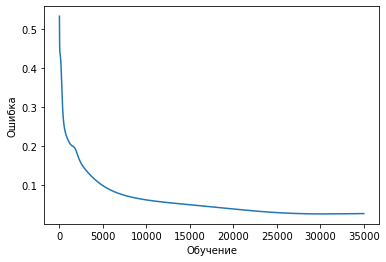

	Точность нейронной сети:	97.26%
	mean_absolute_error train:	0.027
	mean_absolute_error test:	0.044


Шаг обучения: 0.01 Эпох: 35000 Нейронов: 6
	epoсh: 5000
	epoсh: 10000
	epoсh: 15000
	epoсh: 20000
	epoсh: 25000
	epoсh: 30000
	epoсh: 35000


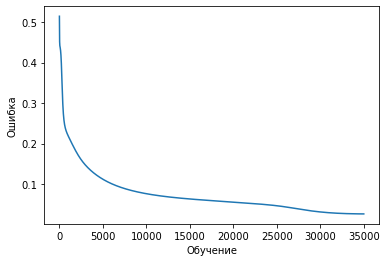

	Точность нейронной сети:	97.39%
	mean_absolute_error train:	0.026
	mean_absolute_error test:	0.046


Шаг обучения: 0.01 Эпох: 35000 Нейронов: 9
	epoсh: 5000
	epoсh: 10000
	epoсh: 15000
	epoсh: 20000
	epoсh: 25000
	epoсh: 30000
	epoсh: 35000


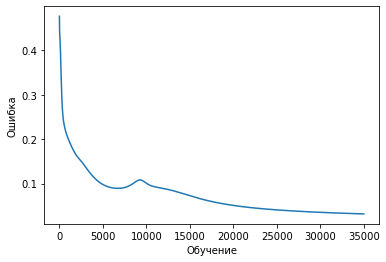

	Точность нейронной сети:	96.82%
	mean_absolute_error train:	0.032
	mean_absolute_error test:	0.057


Шаг обучения: 0.001 Эпох: 300000 Нейронов: 4
	epoсh: 5000
	epoсh: 10000
	epoсh: 15000
	epoсh: 20000
	epoсh: 25000
	epoсh: 30000
	epoсh: 35000
	epoсh: 40000
	epoсh: 45000
	epoсh: 50000
	epoсh: 55000
	epoсh: 60000
	epoсh: 65000
	epoсh: 70000
	epoсh: 75000
	epoсh: 80000
	epoсh: 85000
	epoсh: 90000
	epoсh: 95000
	epoсh: 100000
	epoсh: 105000
	epoсh: 110000
	epoсh: 115000
	epoсh: 120000
	epoсh: 125000
	epoсh: 130000
	epoсh: 135000
	epoсh: 140000
	epoсh: 145000
	epoсh: 150000
	epoсh: 155000
	epoсh: 160000
	epoсh: 165000
	epoсh: 170000
	epoсh: 175000
	epoсh: 180000
	epoсh: 185000
	epoсh: 190000
	epoсh: 195000
	epoсh: 200000
	epoсh: 205000
	epoсh: 210000
	epoсh: 215000
	epoсh: 220000
	epoсh: 225000
	epoсh: 230000
	epoсh: 235000
	epoсh: 240000
	epoсh: 245000
	epoсh: 250000
	epoсh: 255000
	epoсh: 260000
	epoсh: 265000
	epoсh: 270000
	epoсh: 275000
	epoсh: 280000
	epoсh: 285000
	epoсh: 290000
	ep

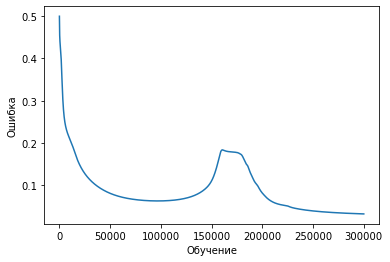

	Точность нейронной сети:	96.76%
	mean_absolute_error train:	0.032
	mean_absolute_error test:	0.049


Шаг обучения: 0.001 Эпох: 300000 Нейронов: 5
	epoсh: 5000
	epoсh: 10000
	epoсh: 15000
	epoсh: 20000
	epoсh: 25000
	epoсh: 30000
	epoсh: 35000
	epoсh: 40000
	epoсh: 45000
	epoсh: 50000
	epoсh: 55000
	epoсh: 60000
	epoсh: 65000
	epoсh: 70000
	epoсh: 75000
	epoсh: 80000
	epoсh: 85000
	epoсh: 90000
	epoсh: 95000
	epoсh: 100000
	epoсh: 105000
	epoсh: 110000
	epoсh: 115000
	epoсh: 120000
	epoсh: 125000
	epoсh: 130000
	epoсh: 135000
	epoсh: 140000
	epoсh: 145000
	epoсh: 150000
	epoсh: 155000
	epoсh: 160000
	epoсh: 165000
	epoсh: 170000
	epoсh: 175000
	epoсh: 180000
	epoсh: 185000
	epoсh: 190000
	epoсh: 195000
	epoсh: 200000
	epoсh: 205000
	epoсh: 210000
	epoсh: 215000
	epoсh: 220000
	epoсh: 225000
	epoсh: 230000
	epoсh: 235000
	epoсh: 240000
	epoсh: 245000
	epoсh: 250000
	epoсh: 255000
	epoсh: 260000
	epoсh: 265000
	epoсh: 270000
	epoсh: 275000
	epoсh: 280000
	epoсh: 285000
	epoсh: 290000
	ep

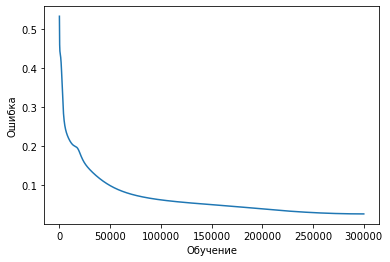

	Точность нейронной сети:	97.34%
	mean_absolute_error train:	0.027
	mean_absolute_error test:	0.047


Шаг обучения: 0.001 Эпох: 300000 Нейронов: 6
	epoсh: 5000
	epoсh: 10000
	epoсh: 15000
	epoсh: 20000
	epoсh: 25000
	epoсh: 30000
	epoсh: 35000
	epoсh: 40000
	epoсh: 45000
	epoсh: 50000
	epoсh: 55000
	epoсh: 60000
	epoсh: 65000
	epoсh: 70000
	epoсh: 75000
	epoсh: 80000
	epoсh: 85000
	epoсh: 90000
	epoсh: 95000
	epoсh: 100000
	epoсh: 105000
	epoсh: 110000
	epoсh: 115000
	epoсh: 120000
	epoсh: 125000
	epoсh: 130000
	epoсh: 135000
	epoсh: 140000
	epoсh: 145000
	epoсh: 150000
	epoсh: 155000
	epoсh: 160000
	epoсh: 165000
	epoсh: 170000
	epoсh: 175000
	epoсh: 180000
	epoсh: 185000
	epoсh: 190000
	epoсh: 195000
	epoсh: 200000
	epoсh: 205000
	epoсh: 210000
	epoсh: 215000
	epoсh: 220000
	epoсh: 225000
	epoсh: 230000
	epoсh: 235000
	epoсh: 240000
	epoсh: 245000
	epoсh: 250000
	epoсh: 255000
	epoсh: 260000
	epoсh: 265000
	epoсh: 270000
	epoсh: 275000
	epoсh: 280000
	epoсh: 285000
	epoсh: 290000
	ep

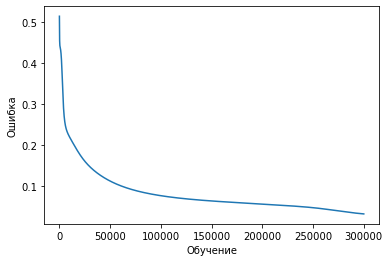

	Точность нейронной сети:	96.88%
	mean_absolute_error train:	0.031
	mean_absolute_error test:	0.059


Шаг обучения: 0.001 Эпох: 300000 Нейронов: 9
	epoсh: 5000
	epoсh: 10000
	epoсh: 15000
	epoсh: 20000
	epoсh: 25000
	epoсh: 30000
	epoсh: 35000
	epoсh: 40000
	epoсh: 45000
	epoсh: 50000
	epoсh: 55000
	epoсh: 60000
	epoсh: 65000
	epoсh: 70000
	epoсh: 75000
	epoсh: 80000
	epoсh: 85000
	epoсh: 90000
	epoсh: 95000
	epoсh: 100000
	epoсh: 105000
	epoсh: 110000
	epoсh: 115000
	epoсh: 120000
	epoсh: 125000
	epoсh: 130000
	epoсh: 135000
	epoсh: 140000
	epoсh: 145000
	epoсh: 150000
	epoсh: 155000
	epoсh: 160000
	epoсh: 165000
	epoсh: 170000
	epoсh: 175000
	epoсh: 180000
	epoсh: 185000
	epoсh: 190000
	epoсh: 195000
	epoсh: 200000
	epoсh: 205000
	epoсh: 210000
	epoсh: 215000
	epoсh: 220000
	epoсh: 225000
	epoсh: 230000
	epoсh: 235000
	epoсh: 240000
	epoсh: 245000
	epoсh: 250000
	epoсh: 255000
	epoсh: 260000
	epoсh: 265000
	epoсh: 270000
	epoсh: 275000
	epoсh: 280000
	epoсh: 285000
	epoсh: 290000
	ep

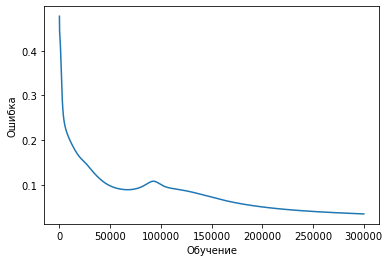

	Точность нейронной сети:	96.46%
	mean_absolute_error train:	0.035
	mean_absolute_error test:	0.061




In [26]:
iteration = 4
lrl = np.logspace(0, -3, iteration)
ep = [5000, 10000, 35000, 300000]
neuron_number = [4, 5, 6, 9]

for i in range(0, iteration):
    for n in neuron_number:
        print(f"Шаг обучения: {lrl[i]} Эпох: {ep[i]} Нейронов: {n}")
        errors = []
        errors, accuracy, w0_tr, w1_tr = two_layer_nn_learning(lr=lrl[i], epoch=ep[i], n_number=n)
        plt.plot(errors)
        plt.xlabel('Обучение')
        plt.ylabel('Ошибка')
        plt.show()

        print("\tТочность нейронной сети:\t" + str(round(accuracy,2)) + "%")
        pr_tr = two_layer_nn_predict(X_train, w0_tr, w1_tr)
        print(f"\tmean_absolute_error train:\t{mean_absolute_error(y_train, pr_tr):.3f}")
        pr_ts = two_layer_nn_predict(X_test, w0_tr, w1_tr)
        print(f"\tmean_absolute_error test:\t{mean_absolute_error(y_test, pr_ts):.3f}\n\n")

Шаг обучения: 0.1 Эпох: 10000 Нейронов: 6
	epoсh: 5000
	epoсh: 10000


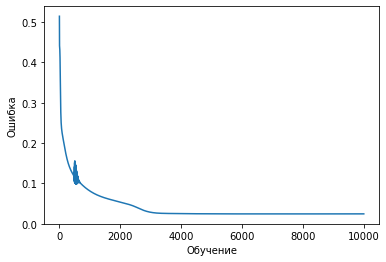

	Точность нейронной сети:	97.56%
	mean_absolute_error train:	0.024
	mean_absolute_error test:	0.038




In [27]:
print(f"Шаг обучения: 0.1 Эпох: 10000 Нейронов: 6")
errors = []
errors, accuracy, w0_tr, w1_tr = two_layer_nn_learning(lr=0.1, epoch=10000, n_number=6)
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show()

print("\tТочность нейронной сети:\t" + str(round(accuracy,2)) + "%")
pr_tr = two_layer_nn_predict(X_train, w0_tr, w1_tr)
print(f"\tmean_absolute_error train:\t{mean_absolute_error(y_train, pr_tr):.3f}")
pr_ts = two_layer_nn_predict(X_test, w0_tr, w1_tr)
print(f"\tmean_absolute_error test:\t{mean_absolute_error(y_test, pr_ts):.3f}\n\n")

## Выводы

Варьирование шага обучения и количества эпох показывает, что при уменьшении шага замедляется достижение минимума функции ошибки. Уменьшение шага ниже 0.1 не позволяет добиться значительного прироста точности. Проверка на test выборке не показывает значительного переобучения.

Параметры: шаг обучения 0.1 количество эпох 10000 позволяют добиться достижимой точности (скрытый слой 6 нейронов) и уменьшить количество итераций.

## Теперь и с SoftMax

In [28]:
def softmax(x):
    temp = np.exp(x)
    return temp / np.sum(temp, axis=1, keepdims=True)

In [29]:
# процесс обучения
def two_layer_nn_learning_softmax(lr=0.1, epoch=100000, n_number=5):
    errors = []
    np.random.seed(1)
    w0 = 2*np.random.random((4, n_number)) - 1 # для входного слоя
    w1 = 2*np.random.random((n_number, 3)) - 1 # для внутреннего слоя
    
    for i in range(epoch):
        # прямое распространение(feed forward)
        layer0 = X_train
        layer1 = sigmoid(np.dot(layer0, w0))
        layer2 = softmax(np.dot(layer1, w1))

        # обратное распространение(back propagation) с использованием градиентного спуска
        layer2_error = (y_train - layer2)/layer2.shape[0]
        layer2_delta = layer2_error * sigmoid_deriv(layer2)

        layer1_error = layer2_delta.dot(w1.T)
        layer1_delta = layer1_error * sigmoid_deriv(layer1)

        w1 += layer1.T.dot(layer2_delta) * lr
        w0 += layer0.T.dot(layer1_delta) * lr

        error = np.mean(np.abs(layer2_error))
        errors.append(error)
        accuracy = (1 - error) * 100

        if not((i+1) % 5000):
            print(f"\tepoсh: {i+1}")
    
    return errors, accuracy, w0, w1

In [30]:
errors = []
errors, accuracy, w0_tr, w1_tr = two_layer_nn_learning_softmax()

	epoсh: 5000
	epoсh: 10000
	epoсh: 15000
	epoсh: 20000
	epoсh: 25000
	epoсh: 30000
	epoсh: 35000
	epoсh: 40000
	epoсh: 45000
	epoсh: 50000
	epoсh: 55000
	epoсh: 60000
	epoсh: 65000
	epoсh: 70000
	epoсh: 75000
	epoсh: 80000
	epoсh: 85000
	epoсh: 90000
	epoсh: 95000
	epoсh: 100000


In [31]:
def two_layer_nn_predict_softmax(x, w0, w1):
    layer0 = x
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = softmax(np.dot(layer1, w1))
    return layer2

In [32]:
pr = two_layer_nn_predict_softmax(X_train, w0_tr, w1_tr)

In [33]:
pr_tr = two_layer_nn_predict_softmax(X_train, w0_tr, w1_tr)
print(f"mean_absolute_error train:\t{mean_absolute_error(y_train, pr_tr):.3f}\n")
pr_ts = two_layer_nn_predict_softmax(X_test, w0_tr, w1_tr)
print(f"mean_absolute_error test:\t{mean_absolute_error(y_test, pr_ts):.3f}\n")

mean_absolute_error train:	0.042

mean_absolute_error test:	0.062



Шаг обучения: 1.0 Эпох: 15000 Нейронов: 3
	epoсh: 5000
	epoсh: 10000
	epoсh: 15000


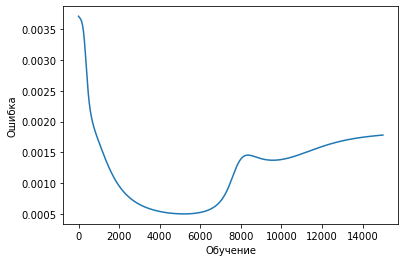

	Точность нейронной сети:	99.82%
	mean_absolute_error train:	0.214
	mean_absolute_error test:	0.212


Шаг обучения: 1.0 Эпох: 15000 Нейронов: 4
	epoсh: 5000
	epoсh: 10000
	epoсh: 15000


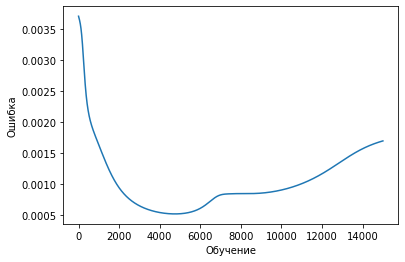

	Точность нейронной сети:	99.83%
	mean_absolute_error train:	0.203
	mean_absolute_error test:	0.203


Шаг обучения: 1.0 Эпох: 15000 Нейронов: 5
	epoсh: 5000
	epoсh: 10000
	epoсh: 15000


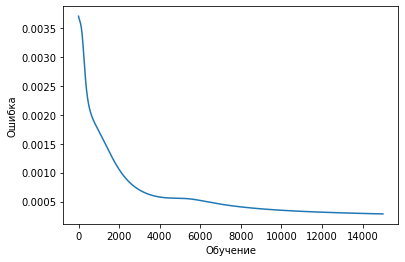

	Точность нейронной сети:	99.97%
	mean_absolute_error train:	0.034
	mean_absolute_error test:	0.055


Шаг обучения: 1.0 Эпох: 15000 Нейронов: 6
	epoсh: 5000
	epoсh: 10000
	epoсh: 15000


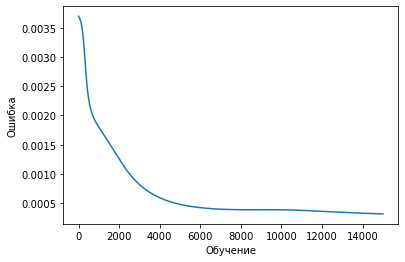

	Точность нейронной сети:	99.97%
	mean_absolute_error train:	0.038
	mean_absolute_error test:	0.056


Шаг обучения: 1.0 Эпох: 15000 Нейронов: 9
	epoсh: 5000
	epoсh: 10000
	epoсh: 15000


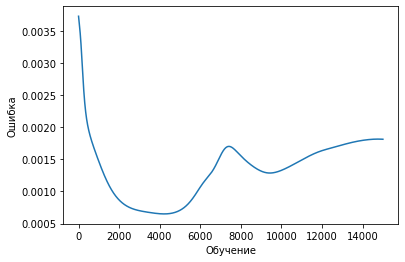

	Точность нейронной сети:	99.82%
	mean_absolute_error train:	0.218
	mean_absolute_error test:	0.228


Шаг обучения: 0.1 Эпох: 55000 Нейронов: 3
	epoсh: 5000
	epoсh: 10000
	epoсh: 15000
	epoсh: 20000
	epoсh: 25000
	epoсh: 30000
	epoсh: 35000
	epoсh: 40000
	epoсh: 45000
	epoсh: 50000
	epoсh: 55000


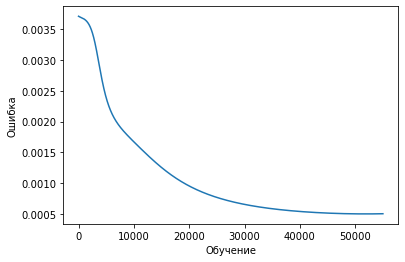

	Точность нейронной сети:	99.95%
	mean_absolute_error train:	0.061
	mean_absolute_error test:	0.081


Шаг обучения: 0.1 Эпох: 55000 Нейронов: 4
	epoсh: 5000
	epoсh: 10000
	epoсh: 15000
	epoсh: 20000
	epoсh: 25000
	epoсh: 30000
	epoсh: 35000
	epoсh: 40000
	epoсh: 45000
	epoсh: 50000
	epoсh: 55000


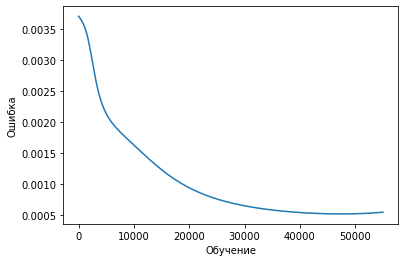

	Точность нейронной сети:	99.95%
	mean_absolute_error train:	0.065
	mean_absolute_error test:	0.084


Шаг обучения: 0.1 Эпох: 55000 Нейронов: 5
	epoсh: 5000
	epoсh: 10000
	epoсh: 15000
	epoсh: 20000
	epoсh: 25000
	epoсh: 30000
	epoсh: 35000
	epoсh: 40000
	epoсh: 45000
	epoсh: 50000
	epoсh: 55000


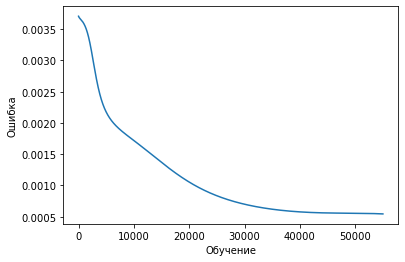

	Точность нейронной сети:	99.95%
	mean_absolute_error train:	0.065
	mean_absolute_error test:	0.083


Шаг обучения: 0.1 Эпох: 55000 Нейронов: 6
	epoсh: 5000
	epoсh: 10000
	epoсh: 15000
	epoсh: 20000
	epoсh: 25000
	epoсh: 30000
	epoсh: 35000
	epoсh: 40000
	epoсh: 45000
	epoсh: 50000
	epoсh: 55000


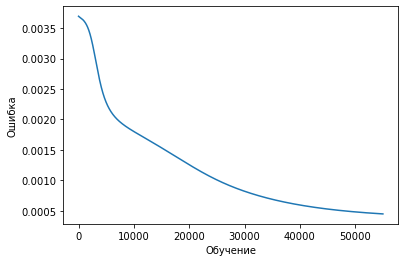

	Точность нейронной сети:	99.96%
	mean_absolute_error train:	0.054
	mean_absolute_error test:	0.070


Шаг обучения: 0.1 Эпох: 55000 Нейронов: 9
	epoсh: 5000
	epoсh: 10000
	epoсh: 15000
	epoсh: 20000
	epoсh: 25000
	epoсh: 30000
	epoсh: 35000
	epoсh: 40000
	epoсh: 45000
	epoсh: 50000
	epoсh: 55000


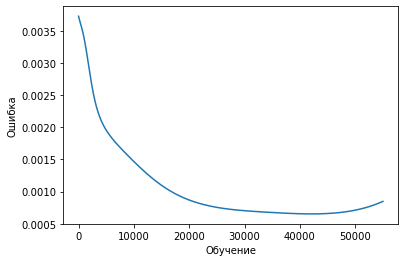

	Точность нейронной сети:	99.92%
	mean_absolute_error train:	0.102
	mean_absolute_error test:	0.113


Шаг обучения: 0.01 Эпох: 350000 Нейронов: 3
	epoсh: 5000
	epoсh: 10000
	epoсh: 15000
	epoсh: 20000
	epoсh: 25000
	epoсh: 30000
	epoсh: 35000
	epoсh: 40000
	epoсh: 45000
	epoсh: 50000
	epoсh: 55000
	epoсh: 60000
	epoсh: 65000
	epoсh: 70000
	epoсh: 75000
	epoсh: 80000
	epoсh: 85000
	epoсh: 90000
	epoсh: 95000
	epoсh: 100000
	epoсh: 105000
	epoсh: 110000
	epoсh: 115000
	epoсh: 120000
	epoсh: 125000
	epoсh: 130000
	epoсh: 135000
	epoсh: 140000
	epoсh: 145000
	epoсh: 150000
	epoсh: 155000
	epoсh: 160000
	epoсh: 165000
	epoсh: 170000
	epoсh: 175000
	epoсh: 180000
	epoсh: 185000
	epoсh: 190000
	epoсh: 195000
	epoсh: 200000
	epoсh: 205000
	epoсh: 210000
	epoсh: 215000
	epoсh: 220000
	epoсh: 225000
	epoсh: 230000
	epoсh: 235000
	epoсh: 240000
	epoсh: 245000
	epoсh: 250000
	epoсh: 255000
	epoсh: 260000
	epoсh: 265000
	epoсh: 270000
	epoсh: 275000
	epoсh: 280000
	epoсh: 285000
	epoсh: 290000
	epo

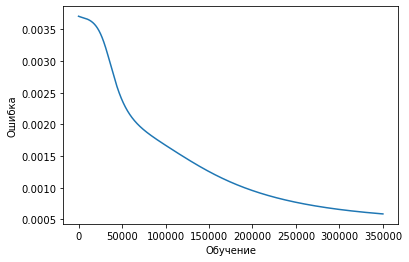

	Точность нейронной сети:	99.94%
	mean_absolute_error train:	0.070
	mean_absolute_error test:	0.088


Шаг обучения: 0.01 Эпох: 350000 Нейронов: 4
	epoсh: 5000
	epoсh: 10000
	epoсh: 15000
	epoсh: 20000
	epoсh: 25000
	epoсh: 30000
	epoсh: 35000
	epoсh: 40000
	epoсh: 45000
	epoсh: 50000
	epoсh: 55000
	epoсh: 60000
	epoсh: 65000
	epoсh: 70000
	epoсh: 75000
	epoсh: 80000
	epoсh: 85000
	epoсh: 90000
	epoсh: 95000
	epoсh: 100000
	epoсh: 105000
	epoсh: 110000
	epoсh: 115000
	epoсh: 120000
	epoсh: 125000
	epoсh: 130000
	epoсh: 135000
	epoсh: 140000
	epoсh: 145000
	epoсh: 150000
	epoсh: 155000
	epoсh: 160000
	epoсh: 165000
	epoсh: 170000
	epoсh: 175000
	epoсh: 180000
	epoсh: 185000
	epoсh: 190000
	epoсh: 195000
	epoсh: 200000
	epoсh: 205000
	epoсh: 210000
	epoсh: 215000
	epoсh: 220000
	epoсh: 225000
	epoсh: 230000
	epoсh: 235000
	epoсh: 240000
	epoсh: 245000
	epoсh: 250000
	epoсh: 255000
	epoсh: 260000
	epoсh: 265000
	epoсh: 270000
	epoсh: 275000
	epoсh: 280000
	epoсh: 285000
	epoсh: 290000
	epo

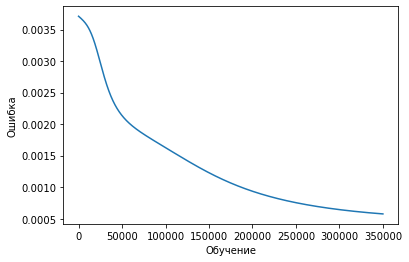

	Точность нейронной сети:	99.94%
	mean_absolute_error train:	0.069
	mean_absolute_error test:	0.089


Шаг обучения: 0.01 Эпох: 350000 Нейронов: 5
	epoсh: 5000
	epoсh: 10000
	epoсh: 15000
	epoсh: 20000
	epoсh: 25000
	epoсh: 30000
	epoсh: 35000
	epoсh: 40000
	epoсh: 45000
	epoсh: 50000
	epoсh: 55000
	epoсh: 60000
	epoсh: 65000
	epoсh: 70000
	epoсh: 75000
	epoсh: 80000
	epoсh: 85000
	epoсh: 90000
	epoсh: 95000
	epoсh: 100000
	epoсh: 105000
	epoсh: 110000
	epoсh: 115000
	epoсh: 120000
	epoсh: 125000
	epoсh: 130000
	epoсh: 135000
	epoсh: 140000
	epoсh: 145000
	epoсh: 150000
	epoсh: 155000
	epoсh: 160000
	epoсh: 165000
	epoсh: 170000
	epoсh: 175000
	epoсh: 180000
	epoсh: 185000
	epoсh: 190000
	epoсh: 195000
	epoсh: 200000
	epoсh: 205000
	epoсh: 210000
	epoсh: 215000
	epoсh: 220000
	epoсh: 225000
	epoсh: 230000
	epoсh: 235000
	epoсh: 240000
	epoсh: 245000
	epoсh: 250000
	epoсh: 255000
	epoсh: 260000
	epoсh: 265000
	epoсh: 270000
	epoсh: 275000
	epoсh: 280000
	epoсh: 285000
	epoсh: 290000
	epo

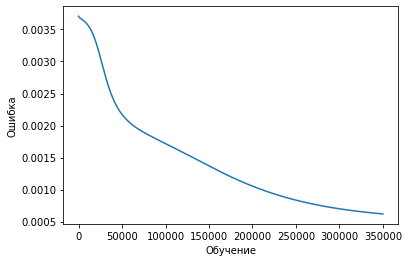

	Точность нейронной сети:	99.94%
	mean_absolute_error train:	0.074
	mean_absolute_error test:	0.091


Шаг обучения: 0.01 Эпох: 350000 Нейронов: 6
	epoсh: 5000
	epoсh: 10000
	epoсh: 15000
	epoсh: 20000
	epoсh: 25000
	epoсh: 30000
	epoсh: 35000
	epoсh: 40000
	epoсh: 45000
	epoсh: 50000
	epoсh: 55000
	epoсh: 60000
	epoсh: 65000
	epoсh: 70000
	epoсh: 75000
	epoсh: 80000
	epoсh: 85000
	epoсh: 90000
	epoсh: 95000
	epoсh: 100000
	epoсh: 105000
	epoсh: 110000
	epoсh: 115000
	epoсh: 120000
	epoсh: 125000
	epoсh: 130000
	epoсh: 135000
	epoсh: 140000
	epoсh: 145000
	epoсh: 150000
	epoсh: 155000
	epoсh: 160000
	epoсh: 165000
	epoсh: 170000
	epoсh: 175000
	epoсh: 180000
	epoсh: 185000
	epoсh: 190000
	epoсh: 195000
	epoсh: 200000
	epoсh: 205000
	epoсh: 210000
	epoсh: 215000
	epoсh: 220000
	epoсh: 225000
	epoсh: 230000
	epoсh: 235000
	epoсh: 240000
	epoсh: 245000
	epoсh: 250000
	epoсh: 255000
	epoсh: 260000
	epoсh: 265000
	epoсh: 270000
	epoсh: 275000
	epoсh: 280000
	epoсh: 285000
	epoсh: 290000
	epo

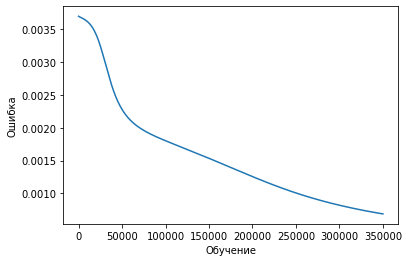

	Точность нейронной сети:	99.93%
	mean_absolute_error train:	0.083
	mean_absolute_error test:	0.094


Шаг обучения: 0.01 Эпох: 350000 Нейронов: 9
	epoсh: 5000
	epoсh: 10000
	epoсh: 15000
	epoсh: 20000
	epoсh: 25000
	epoсh: 30000
	epoсh: 35000
	epoсh: 40000
	epoсh: 45000
	epoсh: 50000
	epoсh: 55000
	epoсh: 60000
	epoсh: 65000
	epoсh: 70000
	epoсh: 75000
	epoсh: 80000
	epoсh: 85000
	epoсh: 90000
	epoсh: 95000
	epoсh: 100000
	epoсh: 105000
	epoсh: 110000
	epoсh: 115000
	epoсh: 120000
	epoсh: 125000
	epoсh: 130000
	epoсh: 135000
	epoсh: 140000
	epoсh: 145000
	epoсh: 150000
	epoсh: 155000
	epoсh: 160000
	epoсh: 165000
	epoсh: 170000
	epoсh: 175000
	epoсh: 180000
	epoсh: 185000
	epoсh: 190000
	epoсh: 195000
	epoсh: 200000
	epoсh: 205000
	epoсh: 210000
	epoсh: 215000
	epoсh: 220000
	epoсh: 225000
	epoсh: 230000
	epoсh: 235000
	epoсh: 240000
	epoсh: 245000
	epoсh: 250000
	epoсh: 255000
	epoсh: 260000
	epoсh: 265000
	epoсh: 270000
	epoсh: 275000
	epoсh: 280000
	epoсh: 285000
	epoсh: 290000
	epo

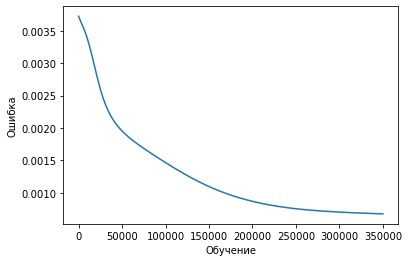

	Точность нейронной сети:	99.93%
	mean_absolute_error train:	0.081
	mean_absolute_error test:	0.094




In [34]:
iteration = 3
lrl = np.logspace(0, -2, iteration)
ep = [15000, 55000, 350000]
neuron_number = [3, 4, 5, 6, 9]

for i in range(0, iteration):
    for n in neuron_number:
        print(f"Шаг обучения: {lrl[i]} Эпох: {ep[i]} Нейронов: {n}")
        errors = []
        errors, accuracy, w0_tr, w1_tr = two_layer_nn_learning_softmax(lr=lrl[i], epoch=ep[i], n_number=n)
        plt.plot(errors)
        plt.xlabel('Обучение')
        plt.ylabel('Ошибка')
        plt.show()

        print("\tТочность нейронной сети:\t" + str(round(accuracy,2)) + "%")
        pr_tr = two_layer_nn_predict_softmax(X_train, w0_tr, w1_tr)
        print(f"\tmean_absolute_error train:\t{mean_absolute_error(y_train, pr_tr):.3f}")
        pr_ts = two_layer_nn_predict_softmax(X_test, w0_tr, w1_tr)
        print(f"\tmean_absolute_error test:\t{mean_absolute_error(y_test, pr_ts):.3f}\n\n")

Шаг обучения: 1 Эпох: 30000 Нейронов: 5
	epoсh: 5000
	epoсh: 10000
	epoсh: 15000
	epoсh: 20000
	epoсh: 25000
	epoсh: 30000


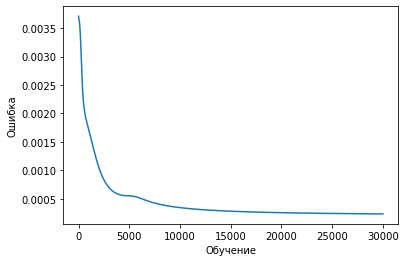

	Точность нейронной сети:	99.98%
	mean_absolute_error train:	0.029
	mean_absolute_error test:	0.050




In [42]:
print(f"Шаг обучения: 1 Эпох: 30000 Нейронов: 5")
errors = []
errors, accuracy, w0_tr, w1_tr = two_layer_nn_learning_softmax(lr=1, epoch=30000, n_number=5)
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show()

print("\tТочность нейронной сети:\t" + str(round(accuracy,2)) + "%")
pr_tr = two_layer_nn_predict_softmax(X_train, w0_tr, w1_tr)
print(f"\tmean_absolute_error train:\t{mean_absolute_error(y_train, pr_tr):.3f}")
pr_ts = two_layer_nn_predict_softmax(X_test, w0_tr, w1_tr)
print(f"\tmean_absolute_error test:\t{mean_absolute_error(y_test, pr_ts):.3f}\n\n")

Слой SoftMax обладает большей "резкостью". Получена лучшая оценка точности при большем шаге, и меньшем скрытом слое <br>(5 нейронов). Продолжает наращивать качество на train и test при большем количестве шагов обучения.